In [83]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [4]:
# Read the ramp summary file to identify which mutant is which
# Use that list to identify which dataframe to add to
# Name the df after the mutant

df = pd.read_excel('ramps_results.xlsx')

In [52]:
df.head()
df_I = df[['Mutant', '40mV I', '-70mV I']]

In [242]:
df.head()

,File,Date,number,ramp threshold,Analysis_start,Analysis_end,Notes,Mutant,RI,40mV I,-70mV I
0,180405_001,180405,1,-1300,30.0,90.0,NaN,T646N,0.144496,-19.226135,-133.056519
1,180405_002,180405,2,-1000,25.0,90.0,NaN,T646N,-0.179389,250.732391,-1397.704956
2,180405_003,180405,3,-500,25.0,88.0,NaN,T646N,-0.478831,163.370758,-341.186523
3,180405_006,180405,6,-1000,90.0,158.0,NaN,WT,-0.484194,785.042847,-1621.340576
4,180405_007,180405,7,-1000,45.0,105.0,NaN,WT,-0.582326,813.089905,-1396.280762


In [248]:
Mutants = df['Mutant'].unique()
df

NameError: name 'Mutants' is not defined

In [250]:
[df['File'] for r in df if df['Mutant'][r] in Mutants]
# [(i,j) for (i,j) in enumerate(my_list)]

KeyError: 'File'

In [53]:
df_controls = df_I[(df_I['Mutant']=='WT') | (df_I['Mutant']=='GRIA1')]
df_paper = df_I[(df_I['Mutant']!='W788L') & (df_I['Mutant']!='I375V')]
df_mutants = df_I[(df_I['Mutant']=='G609R') | (df_I['Mutant']=='A639S')| (df_I['Mutant']=='T646N')]

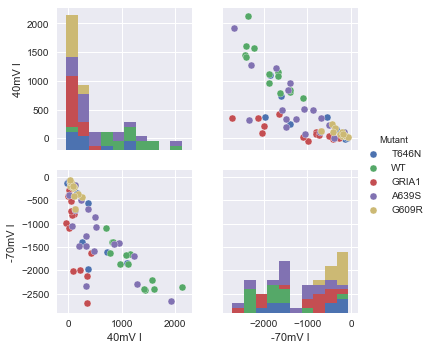

In [71]:
# plot x = 40mV; y = -70mV
# groupby mutant

#fg = seaborn.FacetGrid(data=df, hue='Gender', hue_order=_genders, aspect=1.61)
#fg.map(pyplot.scatter, 'Weight (kg)', 'Height (cm)').add_legend()
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
#sns.regplot(x=idx, y=df['x'], ax=ax1)
#sns.regplot(x=idx, y=df['y'], ax=ax2)

# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

#ax1 = sns.lmplot(x='-70mV I', y='40mV I', hue='Mutant', data=df_paper)

sns.pairplot(df_paper, hue="Mutant")

# df_controls.plot(x='-70mV I', y='40mV I',kind='scatter')

In [179]:
paper_mutants = ['WT', 'GRIA1', 'G609R', 'A639S', 'T646N']
control_mut = ['WT', 'GRIA1']
mutants = ['G609R', 'A639S', 'T646N']

In [229]:

def x_y_scatter(df, savename, mutant_list):
    fig = plt.plot()
    for mutant in mutant_list:
        x = df_I['-70mV I'][(df_I['Mutant']==mutant)]
        y = df_I['40mV I'][(df_I['Mutant']==mutant)]
        plt.scatter(x, y)
    sns.set_style("white")
    sns.despine()
    plt.legend(paper_mutants)
    plt.xlabel('Current at -70mV (pA)', size=16)
    plt.ylabel('Current at 40mV (pA)', size=16)
    plt.tight_layout()
    plt.savefig(savename)
    return plt.show()

names = ['paper_mutants', 'control_mut', 'mutants']
mutant_list_list = [paper_mutants, control_mut, mutants]

x = 0
while x < 3:
    m =  mutant_list_list[x]   
    savename = names[x] + '.png'
    x_y_scatter(df_I, savename, m)
    x += 1


In [215]:
names = ['paper_mutants', 'control_mut', 'mutants']
mutant_list_list = [paper_mutants, control_mut, mutants]
nameDict = dict(zip(names, mutant_list_list))

In [225]:
nameDict

{'control_mut': ['WT', 'GRIA1'],
 'mutants': ['G609R', 'A639S', 'T646N'],
 'paper_mutants': ['WT', 'GRIA1', 'G609R', 'A639S', 'T646N']}

In [126]:
df_RIpaper = df[['RI','Mutant']][(df_I['Mutant']!='W788L') & (df_I['Mutant']!='I375V')]
df_RI_all = df[['RI','Mutant']]

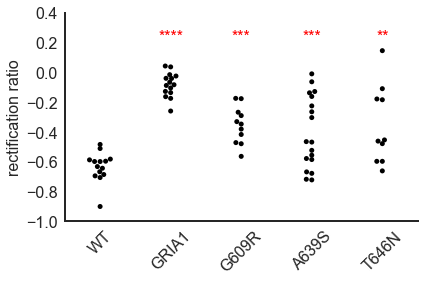

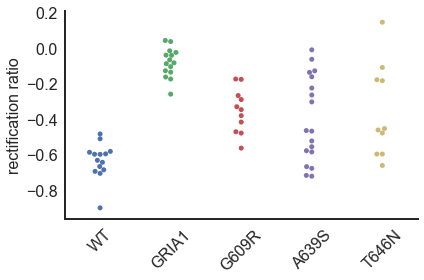

In [274]:
# df_RIpaper.plot(kind='box', x=df_RIpaper['Mutant'], y=df_RIpaper['RI'])


def swarmplot_format():
    sns.set_style("white", {"axes.linewidth": 2})
    plt.xticks(rotation=45, size=16)
    plt.xlabel('')
    plt.yticks(size=16)
    plt.ylabel('rectification ratio', size=16)
    #sns.despine(bottom = True, left=True, trim=True)
    sns.despine()
    plt.tight_layout()
    
    
    


fig = sns.swarmplot(x=df_RIpaper['Mutant'], y=df_RIpaper['RI'], order = paper_mutants, color='black')
swarmplot_format()
plt.ylim(-1, 0.4)

#Annotation:
mutant_order = ['WT', 'GRIA1', 'G609R', 'A639S', 'T646N']
signif = ['', '****', '***', '***', '**']

y = df_RIpaper['RI'].max()
h = y*1.3

def sig_stars(height, star_list, color='black', size=16):
    for x in range(0, len(star_list)):
        plt.text(x, h, star_list[x], ha='center', va='bottom', color=color, size=size)
        pass

sig_stars(h, signif, color='red')


plt.savefig('RectRatio_paper.pdf')
plt.show()




fig2 = plt.figure()
fig2 = sns.swarmplot(x=df_RI_all['Mutant'], y=df_RI_all['RI'], order=mutant_order)
swarmplot_format()

plt.show()

In [143]:
df1 = df_RIpaper.pivot(columns='Mutant', index=None, values='RI')
df2 = df_RI_all.pivot(columns='Mutant', index=None, values='RI')

RI_paper_prism = df1.apply(lambda x: pd.Series(x.dropna().values))
RI_all_prism = df2.apply(lambda x: pd.Series(x.dropna().values))

In [144]:
writer = pd.ExcelWriter('Prism_RI.xlsx', engine='xlsxwriter')
RI_paper_prism.to_excel(writer, sheet_name='Paper_mut')
RI_all_prism.to_excel(writer, sheet_name='All_mutants')
writer.save()

In [203]:
paper_mutants

['WT', 'GRIA1', 'G609R', 'A639S', 'T646N']